In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
test_ff = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"
train_ff = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Train"

Training set: (17007, 28, 28, 1), Labels: (17007, 10)
Testing set: (3010, 28, 28, 1), Labels: (3010, 10)


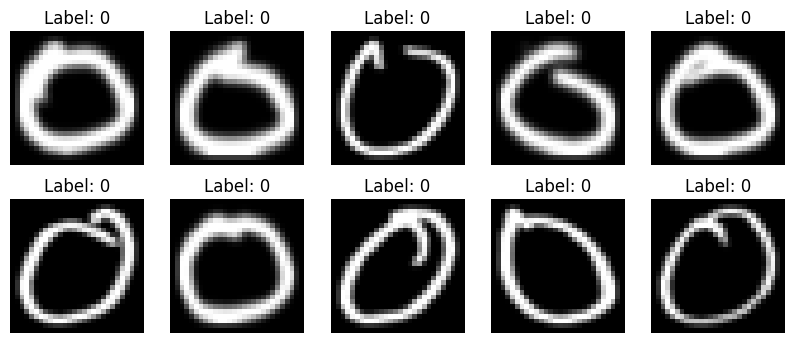

In [ ]:
img_h, img_w = 28, 28


def load_img(folder):
  images = []
  labels = []

  class_names = sorted(os.listdir(folder))
  class_map = {name: i for i, name in enumerate(class_names)}

  for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((img_w, img_h))
            img = np.array(img) / 255.0

            images.append(img)
            labels.append(label)

  return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_img(train_ff)
x_test, y_test = load_img(test_ff)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_h, img_w, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_h, img_w, 1)


# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")  # Fixed incorrect quote
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to match model input shape (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
# Input layer
  inputs = keras.Input(shape=input_shape)
# Flatten layer
  x = keras.layers.Flatten()(inputs)
# Hidden layers
  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation="sigmoid")(x)
  x = keras.layers.Dense(256, activation="sigmoid")(x)
# Output layer
  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
# Create model
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
functional_model.compile(
optimizer="sgd",
loss="categorical_crossentropy",
metrics=["accuracy"]
)

In [ ]:
batch_size = 128
epochs = 700
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = functional_model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1083 - loss: 2.3288 - val_accuracy: 0.1063 - val_loss: 2.3040
Epoch 2/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1135 - loss: 2.3001 - val_accuracy: 0.1063 - val_loss: 2.3000
Epoch 3/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1176 - loss: 2.2990 - val_accuracy: 0.0990 - val_loss: 2.2980
Epoch 4/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1241 - loss: 2.2968 - val_accuracy: 0.1600 - val_loss: 2.2961
Epoch 5/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1261 - loss: 2.2954 - val_accuracy: 0.1063 - val_loss: 2.2943
Epoch 6/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1238 - loss: 2.2932 - val_accuracy: 0.1690 - val_loss: 2.2929
Epoch 7/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1435 - loss: 2.2914 - val_accuracy: 0.1096 - val_loss: 2.2903
Epoch 8/700
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1345 - loss: 2.2882 - val_accu

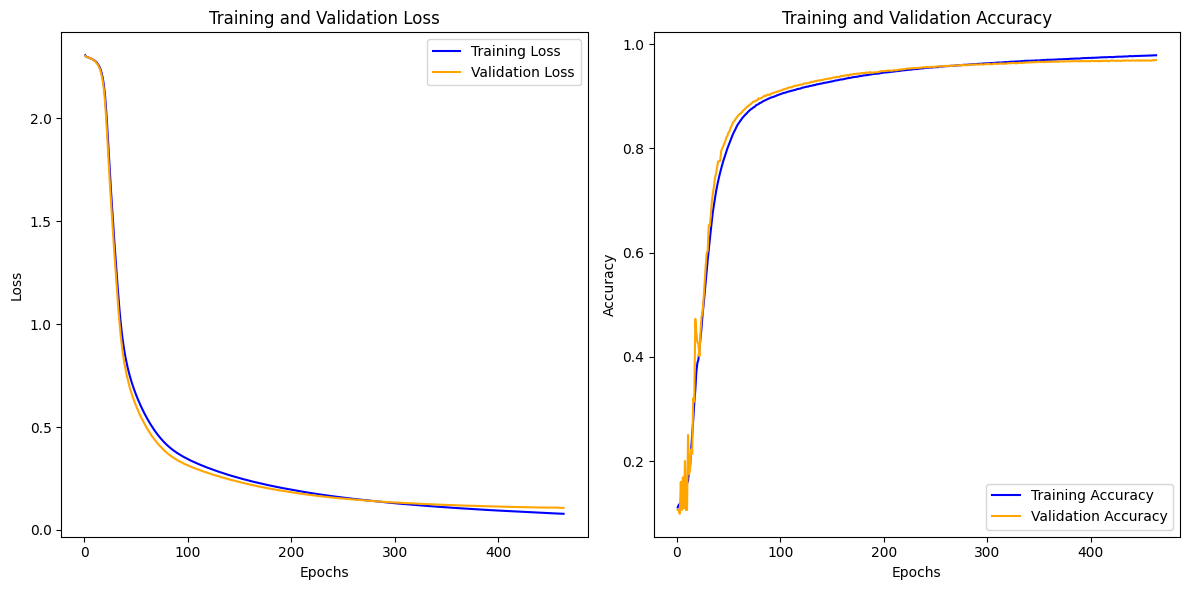

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Predict on test data
predictions = functional_model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [ ]:
functional_model.save('mnist_fully_connected_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')